## load data

In [2]:
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import california_housing

In [1]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_digits
data = load_boston()
#data = load_digits()
datas = data['data']
targets = data['target']

## test pca

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
## PCA

In [250]:
def demean(X:np.ndarray):
    return X - X.mean(axis=0)
    

def normalize(w:np.ndarray):
    return w/np.linalg.norm(w)

def f(w:np.ndarray,X:np.ndarray):
    return np.sum((X.dot(w))**2)/len(X)
    

def df(w:np.ndarray,X:np.ndarray):
    return X.T.dot(X.dot(w))*2 /len(X)

def component(w:np.ndarray,X:np.ndarray,max_iter= 20,epsilon = 1e-8,eta=0.01):
    m = len(X)
    w = np.ones(X.shape[1])
    for iter in np.arange(max_iter):
        random_inx = np.random.permutation(m)
        for i in np.arange(m):
            learning_rate = 5/(10+iter)
            last_f = f(w,X)
            gradient = df(w,X)
            w = w + learning_rate*gradient
            w = normalize(w)
    return w
    '''
    # 使用批量梯度下降法每次会得到不同的结果。。。
    w = normalize(w)
    for iter in np.arange(max_iter):
        learning_rate = 10/(50+iter)
        last_f = f(w,X)
        gradient = df(w,X)
        w = w + learning_rate*gradient
        w = normalize(w)
        if np.abs(last_f-f(w,X))<epsilon:
            break
        return w
    '''
    
def my_pca(X:np.ndarray,n = X.shape[1]):
    assert X.ndim ==2 ,"X must be 2 dimensional"
    assert n<=X.shape[1],"numbers of featured direction must be no more than features of X."
    X_p = demean(X.copy())
    W=[]
    res = []
    for i in np.arange(n):
        w = np.ones(X.shape[1])
        w = component(w,X_p)
        W.append(w)
        x_component = X_p.dot(w)
        res.append(x_component)
        X_p = demean(X_p - x_component.reshape(-1,1)*w)
    return np.array(res).reshape((-1,n)),np.array(W)

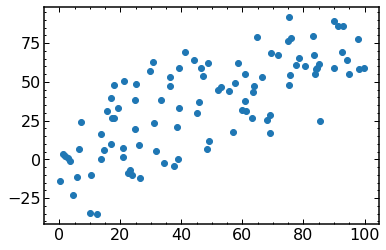

In [251]:
X = np.empty((100,2))
X[:,0]=np.random.uniform(0,100,size=100)
X[:,1]=0.75*X[:,0]+3+np.random.normal(0,10,size=100)*2

plt.scatter(X[:,0],X[:,1])

In [236]:
np.linalg.norm(w)

0.8221250909333959

[0.69031667 0.72350736]
0.9999999999999999


(-50.0, 50.0)

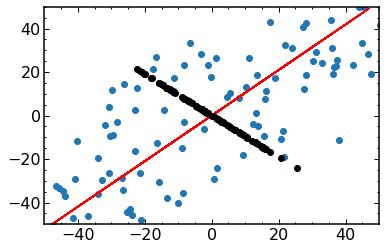

In [252]:

X = demean(X)
w = np.random.rand(X.shape[1])

w = component(w,X)
X_p = X.dot(w).reshape((-1,1))*w
# X_p =np.c_[X.dot(w)*w[0],X.dot(w)*w[1]]
print(w)
print(np.linalg.norm(w))
plt.scatter(X[:,0],X[:,1])
plt.plot(X_p[:,0],X_p[:,1],'r-')
plt.plot(X[:,0]-X_p[:,0],X[:,1]-X_p[:,1],'ko')
plt.xlim([-50,50])
plt.ylim([-50,50])

In [255]:
X_p ,w = pca(X,2)
print(w)

TypeError: 'PCA' object is not callable

(-50.0, 50.0)

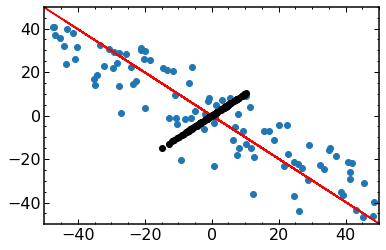

In [103]:
plt.scatter(X[:,0],X[:,1])
plt.plot(X_p[:,0],X_p[:,1],'r-')
plt.plot(X[:,0]-X_p[:,0],X[:,1]-X_p[:,1],'ko')
plt.xlim([-50,50])
plt.ylim([-50,50])

## sklearn中的pca

In [225]:
from sklearn.decomposition import PCA

In [253]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [254]:
pca.components_

array([[-0.69031667, -0.72350736],
       [ 0.72350736, -0.69031667]])

In [229]:
w1 = pca.components_[0]

[0.70927938 0.70492749]
0.9999999999999999


(-50.0, 50.0)

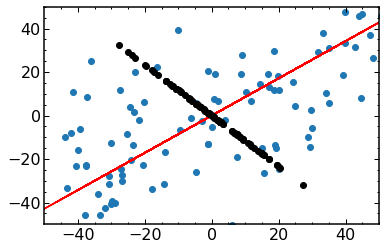

In [230]:
X_p = X.dot(w).reshape((-1,1))*w
# X_p =np.c_[X.dot(w)*w[0],X.dot(w)*w[1]]
print(w1)
print(np.linalg.norm(w1))
plt.scatter(X[:,0],X[:,1])
plt.plot(X_p[:,0],X_p[:,1],'r-')
plt.plot(X[:,0]-X_p[:,0],X[:,1]-X_p[:,1],'ko')
plt.xlim([-50,50])
plt.ylim([-50,50])